In [58]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import mlxtend

In [59]:
df_train=pd.read_csv('../../../raw_data/raw_house/raw_house_train.csv',index_col=0)
df_test=pd.read_csv('../../../raw_data/raw_house/raw_house_test.csv',index_col=0)

In [60]:
sorted(df_train.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

<Figure size 640x480 with 0 Axes>

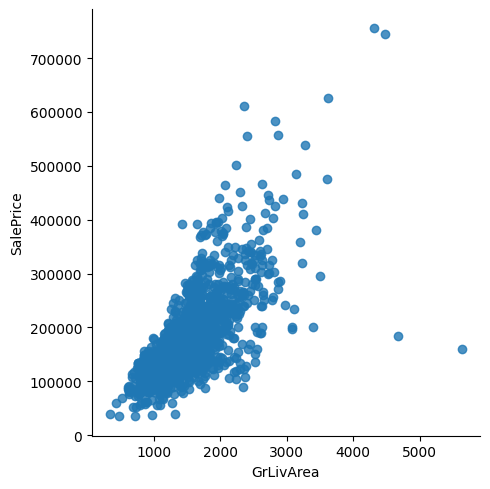

<Figure size 640x480 with 0 Axes>

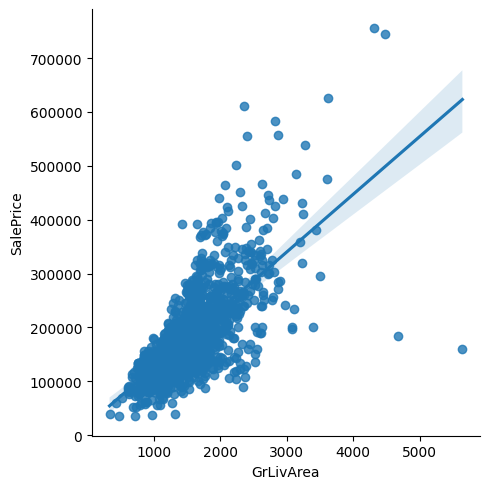

In [61]:
# 회귀같은 경우 y에 대해서도, x에 대해서도 체크를 해야한다.
plt.figure()
otl = sns.lmplot(data=df_train,
                 x = 'GrLivArea',
                 y='SalePrice',
                 fit_reg=False)
plt.show()

plt.figure()
otl = sns.lmplot(data=df_train,
                 x = 'GrLivArea',
                 y='SalePrice',
                 fit_reg=True)
plt.show()

In [62]:
# 회귀같은 경우 y에 대해서도, x에 대해서도 체크를 해야한다.
df_train[df_train['GrLivArea']>4000][['SalePrice','GrLivArea']]

,SalePrice,GrLivArea
Id,,
524,184750,4676
692,755000,4316
1183,745000,4476
1299,160000,5642


In [63]:
df_train.drop(df_train[df_train['GrLivArea']>4000].index,inplace=True)

<Figure size 640x480 with 0 Axes>

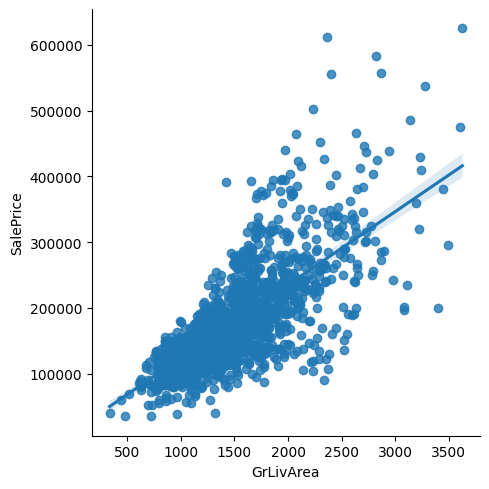

In [64]:

plt.figure()
otl = sns.lmplot(data=df_train,
                 x = 'GrLivArea',
                 y='SalePrice',
                 fit_reg=True)
plt.show()

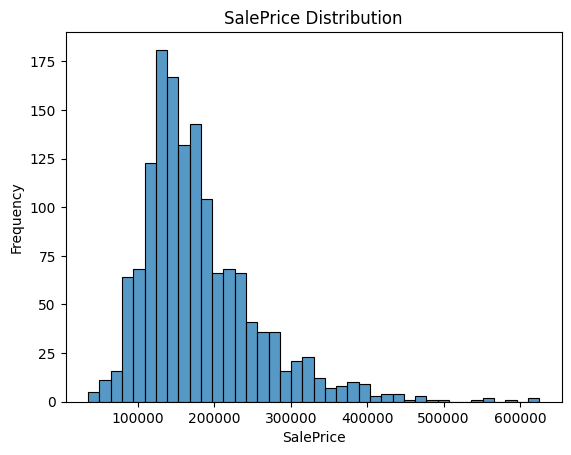

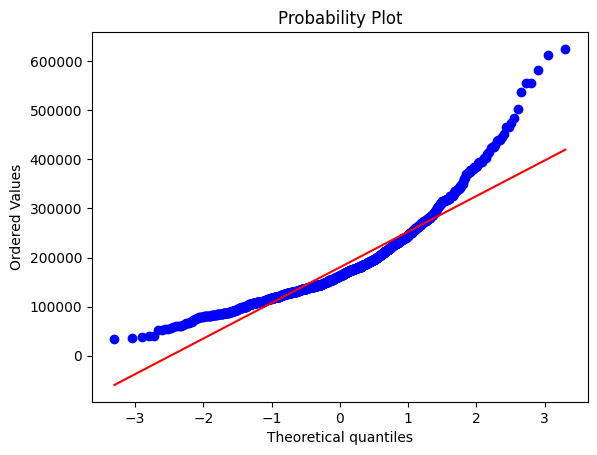

Skewness: 1.566


In [65]:
# 아직 seaborn 에서 stats로 넘기는 부분에서 워닝 부분이 안 되어서 아직은 여기서 워닝에 대한 부분은 타나남.
sns.histplot(df_train['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')
plt.figure()

# stats에 바로 접근하는 부분에 있어서는 array로 명확하게 변환을 해서 넘기면 워닝은 없어짐!!!!
qq = stats.probplot(np.array(df_train['SalePrice']), plot=plt)
plt.show()
print("Skewness: {:.3f}".format(df_train['SalePrice'].skew()))



In [66]:
# np.log1p(arr) = log(arr+1)
# np.expm1(arr) = exp(arr-1)
df_train['SalePrice']=np.log1p(df_train['SalePrice'])

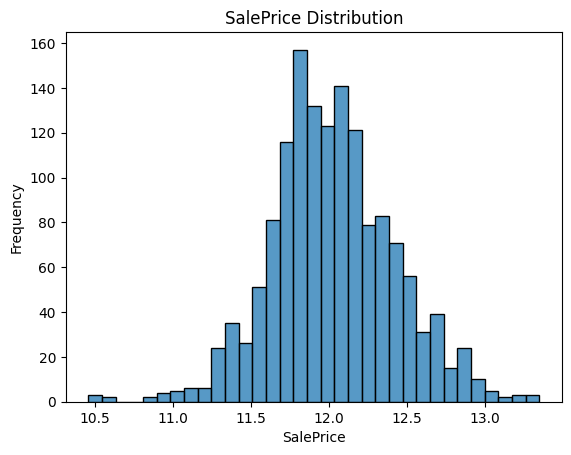

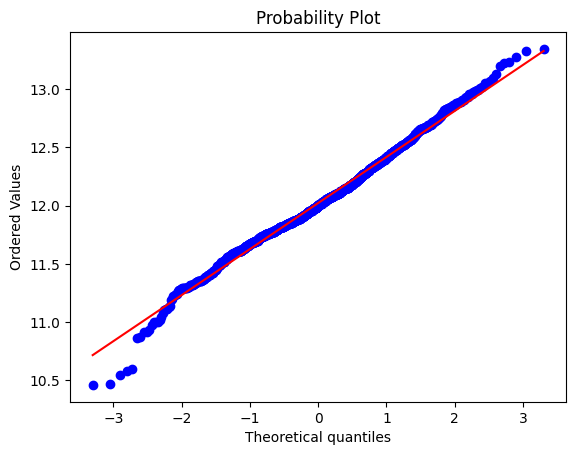

Skewness: 0.065


In [67]:
sns.histplot(df_train['SalePrice'])
plt.title('SalePrice Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(np.array(df_train['SalePrice']), plot=plt)
plt.show()

print("Skewness: {:.3f}".format(df_train['SalePrice'].skew()))

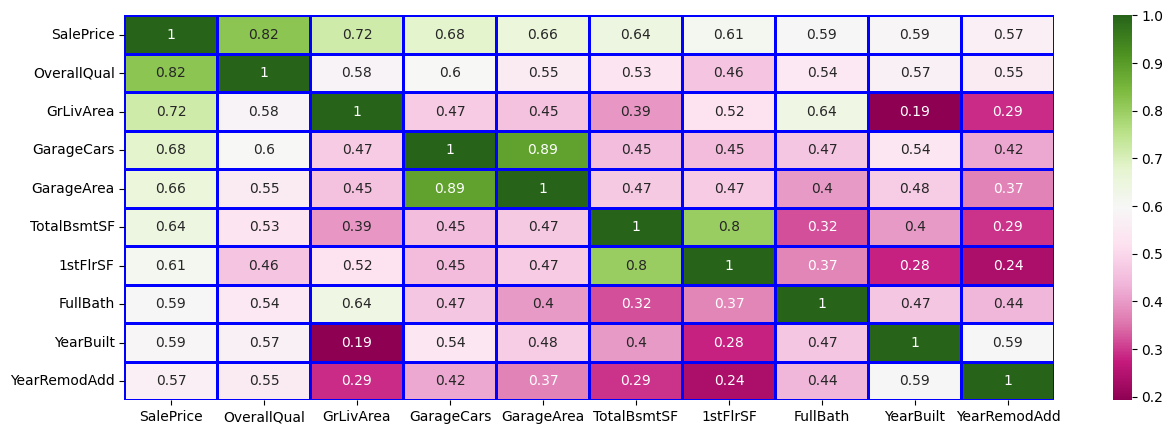

In [68]:
plt.figure(figsize=(15,5))

corr_train = df_train.corr(numeric_only=True)

num = 10
col = corr_train.nlargest(num, 'SalePrice')['SalePrice'].index
coeff = np.corrcoef(df_train[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='PiYG', linecolor='blue')

In [69]:
target=df_train['SalePrice']
data = df_train.drop(['SalePrice'],axis=1)

In [70]:
print(df_test.shape)

print(data.shape)
print(target.shape)

(1459, 79)
(1456, 79)
(1456,)


# Preprocessing

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuil

In [72]:
# null check
train_ms = pd.DataFrame(data.isna().sum(),columns=['MissingCount'])
train_ms = train_ms[train_ms['MissingCount']!=0]
train_ms['Missing %'] = train_ms['MissingCount']/ len(data) *100
train_ms.sort_values('MissingCount',ascending=False)

,MissingCount,Missing %
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageType,81,5.563187
GarageYrBlt,81,5.563187
GarageFinish,81,5.563187
GarageQual,81,5.563187


In [73]:
nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

In [74]:
data.loc[:,nones]=data.loc[:,nones].fillna('None')
df_test.loc[:,nones]=df_test.loc[:,nones].fillna('None')

In [75]:
print(data.loc[:,nones].isna().sum().sum())
print(df_test.loc[:,nones].isna().sum().sum())

0
0


In [76]:
zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

In [77]:
data.loc[:,zeros]=data.loc[:,zeros].fillna(0)
df_test.loc[:,zeros]=df_test.loc[:,zeros].fillna(0)

In [78]:
print(data.loc[:,zeros].isna().sum().sum())
print(df_test.loc[:,zeros].isna().sum().sum())

0
0


In [79]:
print(data['Utilities'].value_counts(),'\n')
print(df_test['Utilities'].value_counts())

data.drop(['Utilities'],axis=1,inplace=True)
df_test.drop(['Utilities'],axis=1,inplace=True)

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64 

AllPub    1457
Name: Utilities, dtype: int64


In [80]:
print(data['MSZoning'].value_counts(),'\n')
print(df_test['MSZoning'].value_counts())

data['MSZoning'].fillna(data['MSZoning'].mode()[0],inplace=True)
# fillna based on train_data
df_test['MSZoning'].fillna(data['MSZoning'].mode()[0],inplace=True)

RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [81]:
freq = ['MSZoning','Exterior1st',
        'Exterior2nd','SaleType','Electrical',
        'KitchenQual','Functional']

for fr in freq:
    data[fr].fillna(data[fr].mode()[0], inplace=True)
    df_test[fr].fillna(data[fr].mode()[0], inplace=True)

In [82]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)
df_test['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)

In [83]:
from sklearn.preprocessing import LabelEncoder
ordinals = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence']

for col in ordinals:
    lbe = LabelEncoder()
    data[col]=lbe.fit_transform(data[col])
    df_test[col]=lbe.transform(df_test[col])

In [84]:
# 뒤에서 그냥  get_dummy로 처리할 것임...
nominals = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [85]:
a=data.loc[:,nominals]
b=df_test.loc[:,nominals]

In [86]:
no_use = list()
for col in a.columns:
    if set(a[col].unique()) != set(b[col].unique()):
        print(col)
        no_use.append(col)

data.drop(no_use,axis=1,inplace=True)
df_test.drop(no_use,axis=1,inplace=True)

Condition2
HouseStyle
RoofMatl
Exterior1st
Exterior2nd
Heating
MiscFeature


In [87]:
data=pd.get_dummies(data)
df_test=pd.get_dummies(df_test)

In [89]:
data.to_csv('train_data_preprocessed.csv')
df_test.to_csv('test_data_preprocessed.csv')
target.to_csv('train_target.csv')

In [35]:
# pd.get_dummies(df_test.loc[:,nominals])

In [36]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor

# ssc = StandardScaler()
# data_ssc=ssc.fit_transform(data)
# df_test_ssc = ssc.transform(df_test)
# x_train,x_test,y_train,y_test = train_test_split(data_ssc,target,test_size=0.2,random_state=42,shuffle=True)